# Import data & packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [ ]:
tracks = pd.read_csv('/content/sample_data/First Data Science Model/dataset.csv')
tracks.head()


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [ ]:
tracks.shape
# (number_of_rows, number_of_columns)

(114000, 21)

In [ ]:

tracks.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

# Clean data

In [ ]:
(tracks
    .groupby(['track_name', 'artists'])  # Group by track name and artist; we want to know how many rows have each combination of these
    .size()  # Count rows in each group
    .reset_index(name='count')  # Turn the result back into a dataframe
    .sort_values('count', ascending=False)  # Sort by the count, with the largest values at the top
    .head(20)  # Show the top 20 values
)


,track_name,artists,count
55570,Run Rudolph Run,Chuck Berry,151
37981,Little Saint Nick - 1991 Remix,The Beach Boys,76
36539,Last Last,Burna Boy,75
23998,Frosty The Snowman,Ella Fitzgerald,69
12168,Christmas Time,Bryan Adams,66
14480,CÓMO SE SIENTE - Remix,Jhayco;Bad Bunny,64
59376,Sleigh Ride,Ella Fitzgerald,60
53125,RUMBATÓN,Daddy Yankee,60
74573,X ÚLTIMA VEZ,Daddy Yankee;Bad Bunny,58
22385,Feliz Cumpleaños Ferxxo,Feid,54


We have a lot of duplicates - "Run Rudolph Run" by Chuck Berry appears in our data 151 times!

In [ ]:
data = tracks.groupby(['track_name', 'artists']).first().reset_index()
data.shape

(81343, 21)

In [ ]:
data_numeric = data.select_dtypes(include='number')
data_numeric.head()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,36750,52,178533,0.823,0.6120,1,-7.767,1,0.2480,0.168,0.00000,0.1090,0.6880,142.959,4
1,92751,39,151680,0.615,0.3750,0,-10.362,0,0.0319,0.482,0.00000,0.1110,0.9220,110.720,4
2,66970,32,84305,0.553,0.8120,3,-5.542,1,0.0558,0.132,0.00001,0.0794,0.8710,118.368,4
3,66996,8,86675,0.664,0.6110,3,-8.687,1,0.0886,0.120,0.00000,0.0408,0.7580,118.443,4
4,101161,0,289133,0.111,0.0568,10,-28.053,1,0.0551,0.990,0.69700,0.1100,0.0395,169.401,1


# Exploratory data analysis

In [ ]:
data_numeric.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,81343.000000,81343.000000,8.134300e+04,81343.000000,81343.000000,81343.000000,81343.000000,81343.000000,81343.000000,81343.000000,81343.000000,81343.000000,81343.000000,81343.000000,81343.000000
mean,53670.386806,34.636392,2.314145e+05,0.559276,0.635025,5.285900,-8.593930,0.632347,0.088993,0.329666,0.184733,0.219723,0.463277,122.144834,3.896967
std,33488.591277,19.438517,1.164924e+05,0.177747,0.258641,3.557629,5.304797,0.482169,0.116629,0.339961,0.331592,0.198272,0.263383,30.129012,0.456398
min,0.000000,0.000000,8.586000e+03,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24074.500000,21.000000,1.738710e+05,0.446000,0.455000,2.000000,-10.451500,0.000000,0.036100,0.015900,0.000000,0.098500,0.241000,99.408000,4.000000
50%,50566.000000,35.000000,2.152050e+05,0.573000,0.678000,5.000000,-7.262000,1.000000,0.049100,0.190000,0.000089,0.133000,0.449000,122.030000,4.000000
75%,80721.500000,49.000000,2.673460e+05,0.690000,0.857000,8.000000,-5.140000,1.000000,0.087000,0.629000,0.153000,0.283000,0.676000,140.128500,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


<Axes: xlabel='popularity', ylabel='Count'>

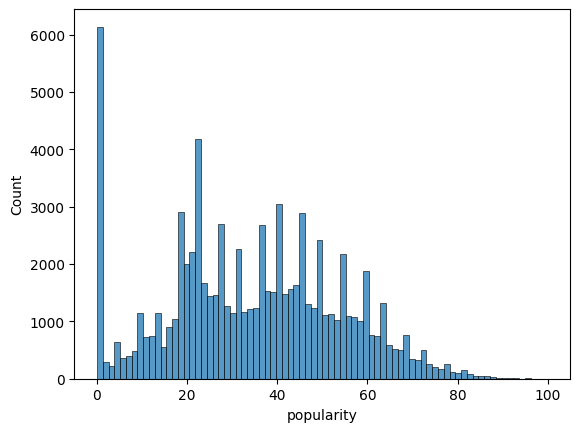

In [ ]:
import seaborn as sns
sns.histplot(data_numeric, x='popularity')

Text(0, 0.5, 'Acousticness')

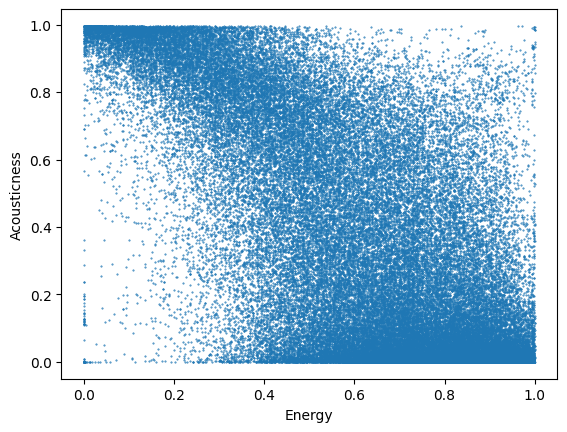

In [ ]:
plt.scatter('energy', 'acousticness', data=data_numeric, s=0.2)
plt.xlabel("Energy")
plt.ylabel("Acousticness")

Look at the relationship between "energy" and "acousticness"

These features look like they have a negative correlation!

We can quantify this using the correlation coefficient. This gives us a number between -1 and 1. A number close to -1 or 1 means the features are strongly related, while a number close to 0 means they're not.

<Axes: >

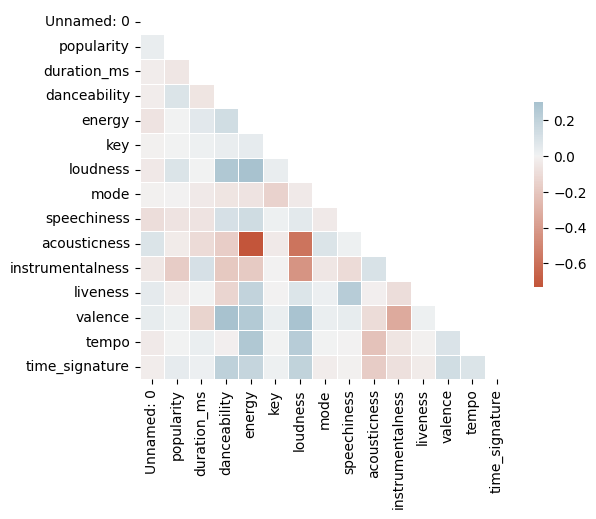

In [ ]:
# Calculate correlations
corr = data_numeric.corr()

# This helps us only plot half the square, because it's symmetrical
mask = np.triu(np.ones_like(corr, dtype=bool))

# Define a nice set of colours
cmap = sns.diverging_palette(20, 230, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Clustering

We'll use simple machine learning algorithm called k-means. This is an unsupervised learning algorithm.
Because this algorithm looks at the distances between songs, it doesn't work well with features on different scales.

 Hence we'll scale our data so that every value is between 0 and 1 using a min-max scaler:

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_numeric)

# Turn back into a pandas dataframe so it's easier to reuse later
data_scaled = pd.DataFrame(data_scaled, columns=data_numeric.columns)

In [ ]:
from sklearn.cluster import KMeans

# Fit the clustering algorithm
k_means = KMeans(n_clusters=3)
k_means.fit(data_scaled)

# Assign a cluster to each song
clusters = k_means.predict(data_scaled)

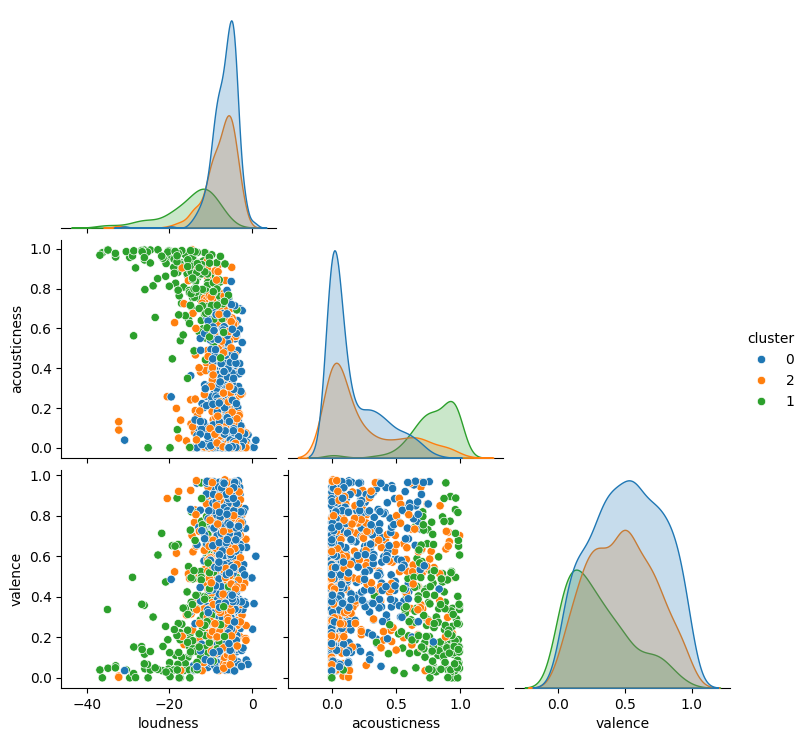

In [ ]:
data_clustered = data_numeric
data_clustered["cluster"] = clusters.astype(str)

# Pick a smaller random sample of points to make the plot easier to read
to_plot = data_clustered.sample(1000)
# Pick a smaller selection of columns too
to_plot = to_plot[['loudness', 'acousticness', 'valence', 'cluster']]

# Plot a few pairs of columns - not plotting everything just to keep things under control
sns.pairplot(to_plot, hue='cluster', corner=True)

In [ ]:
for i in range(max(clusters)+1):
    print("Cluster", i)
    print("=========")
    songs = data[data_clustered['cluster'] == str(i)].sample(5).reset_index()
    for s in songs.iterrows():
        print(f"{s[1]['track_name']} - {s[1]['artists']} ({s[1]['track_genre']})")
    print()

Cluster 0
One Last Time - Ariana Grande (dance)
Grafton Road - Ryan Elliott (detroit-techno)
Music's In Me - Original Mix - Paul Johnson (chicago-house)
Featuring Mixx Master Lee, Red Rum & J. Smoov (Funky Mix) - Mixx Master Lee (kids)
Sleep Relax - Rain Sounds (sleep)

Cluster 1
Puppy Love - Remix - Paul Anka (rock-n-roll)
Malenkij Kreolčik - Alexander Vertinsky (romance)
Kho Gaye Hum Kahan - Jasleen Royal;Prateek Kuhad (indian)
Nos vas a brindar honor - Analy (disney)
Anybody Seen My Baby - Acoustic Version - Groove Da Praia (jazz)

Cluster 2
Rock That Body - Black Eyed Peas (dance)
Yonko - Rustage;Shwabadi;PE$O PETE;Lex Bratcher;Connor Quest! (anime)
Nada Ha Cambiao’ - Daddy Yankee;Divino (hip-hop)
Kak propal soldat - Gelena Velikanova (romance)
It-Just-Is - Octave One (detroit-techno)



# Regression

In [ ]:
# Separate input data (X) from target variable (y)
X = data_scaled.drop('popularity', axis=1)
y = data_scaled['popularity']

In [ ]:
# Split into train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

print("Training set size:", y_train.shape)
print("Test set size:", y_test.shape)

Training set size: (61007,)
Test set size: (20336,)


In [ ]:
from sklearn.linear_model import LinearRegression

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

<Axes: ylabel='Count'>

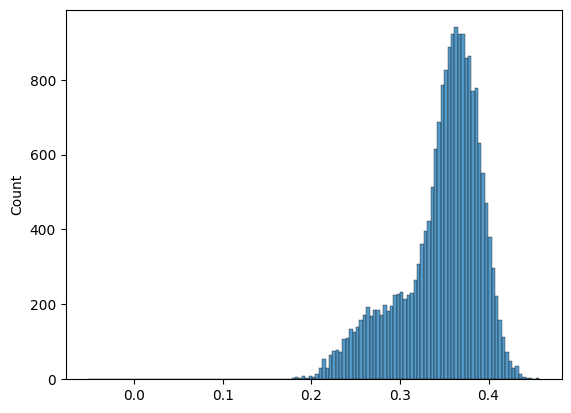

In [ ]:
y_pred = model.predict(X_test)
sns.histplot(y_pred)

Text(0, 0.5, 'Predicted')

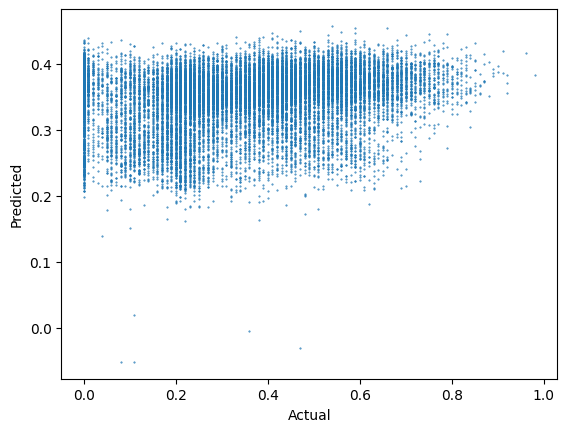

In [ ]:
plt.scatter(y_test, y_pred, s=0.2)
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)


0.036017366560642396

This model performs quite poorly.